<center><img src="https://github.com/DACSS-CSSmeths/guidelines/blob/main/pics/small_logo_ccs_meths.jpg?raw=true" width="700"></center>







-------

# Spatial AutoCorrelation



## I. Getting ready


### Install and activate libraries needed

Let's verify:

In [1]:
# Verify necessary libraries are installed
!pip show pysal pandas geopandas

# Import geopandas for spatial data handling
import geopandas as gpd

# Import libpysal Graph for spatial relationships
from libpysal.graph import Graph

# Import pandas for data manipulation
import pandas as pd

# Import esda for spatial statistics
import esda # from pysal

# Import matplotlib for plotting
import matplotlib.pyplot as plt

# Set random seed for reproducibility
from numpy.random import seed
seed(42)

Name: pysal
Version: 25.7
Summary: Meta Package for PySAL - A library of spatial analysis functions
Home-page: 
Author: 
Author-email: Serge Rey <sjsrey@gmail.com>, Levi Wolf <levi.john.wolf@gmail.com>
License: BSD 3-Clause
Location: /usr/local/lib/python3.12/dist-packages
Requires: access, beautifulsoup4, esda, geopandas, giddy, inequality, libpysal, mapclassify, mgwr, momepy, numpy, packaging, pandas, platformdirs, pointpats, requests, scikit-learn, scipy, segregation, shapely, spaghetti, spglm, spint, splot, spopt, spreg, tobler
Required-by: 
---
Name: pandas
Version: 2.2.2
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: 
Author-email: The Pandas Development Team <pandas-dev@python.org>
License: BSD 3-Clause License

Copyright (c) 2008-2011, AQR Capital Management, LLC, Lambda Foundry, Inc. and PyData Development Team
All rights reserved.

Copyright (c) 2011-2023, Open source contributors.

Redistribution 

### The Data

Using the URL from GitHub, read the Peru map:

In [2]:
# Read the map data from Github
LinkPeru="https://github.com/DACSS-690C-Winter-2025-MG/spatialdata-homework1/raw/refs/heads/main/PeruMaps.gpkg"

# Read the Peru map using geopandas, specifying the 'good_geom' layer
peru=gpd.read_file(LinkPeru,layer='good_geom')

# Display geo data frame
peru


,DEPARTAMENTO,PROVINCIA,DISTRITO,ubigeo,Poblacion,IDH2019,Educ_sec_comp2019_pct,NBI2017_pct,Viv_sin_serv_hig2017_pct,geometry
0,Apurimac,ABANCAY,ABANCAY,PE030101,56871,0.600375,78.865450,15.8,2.9,"MULTIPOLYGON (((-72.93158 -13.55616, -72.9314 ..."
1,Ancash,BOLOGNESI,ABELARDO PARDO LEZAMETA,PE020502,1263,0.434687,50.434603,33.6,25.4,"MULTIPOLYGON (((-77.1474 -10.29675, -77.14643 ..."
2,Arequipa,CARAVELI,ACARI,PE040302,3010,0.634185,56.273614,26.2,8.8,"MULTIPOLYGON (((-74.61542 -15.13728, -74.61174..."
3,Ancash,OCROS,ACAS,PE021402,1057,0.469140,72.527156,70.4,67.6,"MULTIPOLYGON (((-77.26312 -10.43537, -77.26356..."
4,Cusco,PARURO,ACCHA,PE081002,3839,0.300626,64.586647,28.6,11.1,"MULTIPOLYGON (((-71.80912 -13.92427, -71.80901..."
...,...,...,...,...,...,...,...,...,...,...
1868,Tumbes,ZARUMILLA,ZARUMILLA,PE240301,23148,0.551753,65.695279,35.3,10.4,"MULTIPOLYGON (((-80.22546 -3.43294, -80.22887 ..."
1869,Puno,CHUCUITO,ZEPITA,PE210407,19161,0.239436,62.512902,47.7,36.4,"MULTIPOLYGON (((-69.13646 -16.35465, -69.13648..."
1870,Tumbes,CONTRALMIRANTE VILLAR,ZORRITOS,PE240201,12785,0.568343,68.791165,28.7,9.1,"MULTIPOLYGON (((-80.55398 -3.73355, -80.55359 ..."
1871,Lima,CANETE,ZUNIGA,PE150516,1912,0.686133,68.737112,38.2,8.9,"MULTIPOLYGON (((-75.95941 -12.84897, -75.96013..."


The Peru map is not projected, therefore we reproject and plot it

Checking:

* the crs
* confirming crs is projected
* geom(s) type
* usual: data types and num rows and columns

EPSG: 5387
Is projected: True
Geometry types: {'MultiPolygon'}
Column dtypes:
 DEPARTAMENTO                  object
PROVINCIA                     object
DISTRITO                      object
ubigeo                        object
Poblacion                      int64
IDH2019                      float64
Educ_sec_comp2019_pct        float64
NBI2017_pct                  float64
Viv_sin_serv_hig2017_pct     float64
geometry                    geometry
dtype: object
Shape (rows, cols): (1873, 10)


<Axes: >

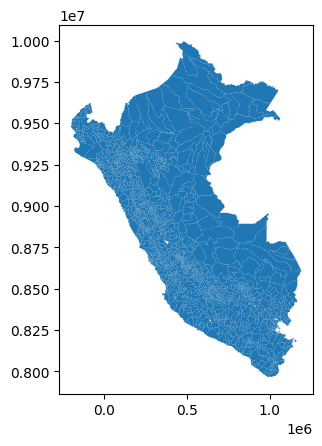

In [12]:
# Check current CRS information:
# - EPSG code
# - Whether it's projected
# - Geometry types present
# - Data types of columns
# - Shape (rows and columns)
peru.crs.to_epsg(),\
peru.crs.is_projected, \
set(peru.geom_type),\
peru.dtypes, \
peru.shape

# Print results
print("EPSG:", peru.crs.to_epsg())
print("Is projected:", peru.crs.is_projected)
print("Geometry types:", set(peru.geom_type))
print("Column dtypes:\n", peru.dtypes)
print("Shape (rows, cols):", peru.shape)

# Reproject Peru's map to CRS 5387 (Peru-specific projected coordinate system)
peru=peru.to_crs(5387)

# Plot the reprojected map to verify
peru.plot()

Keep the DEPARTAMENTO of **Lima**

There are duplicate names in distrito, therefore we will not set the index to distrito

In [4]:
# Only keep Lima and display data frame
lima = peru[peru['DEPARTAMENTO'] == 'Lima']
print("Lima data:")
display(lima)

# Check if any duplicate names in distrito
print("Duplicated DISTRITO rows:")
display(lima[lima['DISTRITO'].duplicated()])

Lima data:


,DEPARTAMENTO,PROVINCIA,DISTRITO,ubigeo,Poblacion,IDH2019,Educ_sec_comp2019_pct,NBI2017_pct,Viv_sin_serv_hig2017_pct,geometry
39,Lima,YAUYOS,ALIS,PE151002,1233,0.646897,69.474298,30.3,6.6,"MULTIPOLYGON (((415396.076 8647591.116, 415450..."
40,Lima,YAUYOS,AYAUCA,PE151003,2293,0.544152,43.167400,61.9,57.2,"MULTIPOLYGON (((389530.693 8626520.884, 389743..."
54,Lima,HUAURA,AMBAR,PE150802,2761,0.316448,42.060097,73.3,60.2,"MULTIPOLYGON (((243293.978 8826436.11, 243328...."
65,Lima,LIMA,ANCON,PE150102,42124,0.668889,72.117976,21.7,1.1,"MULTIPOLYGON (((281417 8715329, 281397.439 871..."
71,Lima,OYON,ANDAJES,PE150902,1058,0.488913,71.684369,36.4,28.5,"MULTIPOLYGON (((291522.945 8820149.937, 291499..."
...,...,...,...,...,...,...,...,...,...,...
1799,Lima,LIMA,VILLA MARIA DEL TRIUNFO,PE150143,473036,0.689812,73.895534,21.9,1.3,"MULTIPOLYGON (((294277.314 8649754.267, 294333..."
1804,Lima,YAUYOS,VINAC,PE151032,1906,0.353468,48.996169,57.8,45.3,"MULTIPOLYGON (((415274.705 8578168.622, 415429..."
1813,Lima,YAUYOS,VITIS,PE151033,665,0.515071,58.157218,20.1,13.6,"MULTIPOLYGON (((415484.035 8649162.757, 415430..."
1850,Lima,YAUYOS,YAUYOS,PE151001,2905,0.578646,68.601779,37.3,17.3,"MULTIPOLYGON (((406970.333 8623705.927, 406944..."


Duplicated DISTRITO rows:


,DEPARTAMENTO,PROVINCIA,DISTRITO,ubigeo,Poblacion,IDH2019,Educ_sec_comp2019_pct,NBI2017_pct,Viv_sin_serv_hig2017_pct,geometry
827,Lima,YAUYOS,LARAOS,PE151018,725,0.615805,56.024786,55.3,15.8,"MULTIPOLYGON (((435571.519 8638480.501, 435573..."
979,Lima,YAUYOS,MIRAFLORES,PE151021,447,0.415099,12.358409,24.9,15.6,"MULTIPOLYGON (((411925.542 8644345.184, 411819..."
1365,Lima,HUAROCHIRI,SAN ANTONIO,PE150716,5785,0.375590,39.073602,88.6,60.2,"MULTIPOLYGON (((323776.143 8697214.589, 323677..."
1451,Lima,CANETE,SAN LUIS,PE150514,13420,0.685163,77.077495,22.1,7.1,"MULTIPOLYGON (((349362.365 8555804.007, 349274..."


## II. Neighborhoods & LISA Maps


### II.1 QUEEN

Get a neighborhood  matrix using QUEEN

In [5]:
# Build Queen contiguity spatial weights (rook=False means Queen)
queen_peru=Graph.build_contiguity(lima, rook=False)

# Create custom function to convert adjacency to wide matrix format
toWideMatrix=lambda g:pd.DataFrame(g.adjacency).unstack().fillna(0)

# Apply the function to create Queen adjacency matrix
queen_peru_Matrix=toWideMatrix(queen_peru)

# Display the matrix
queen_peru_Matrix

# Check for isolates (districts with no neighbors) - these can cause issues
queen_peru.isolates

# Normalize the Queen weights matrix (row-standardize: each row sums to 1)
queen_peru=queen_peru.transform("r")

Produce the LISA MAP using the normalized Queen neighborhood matrix

<Axes: >

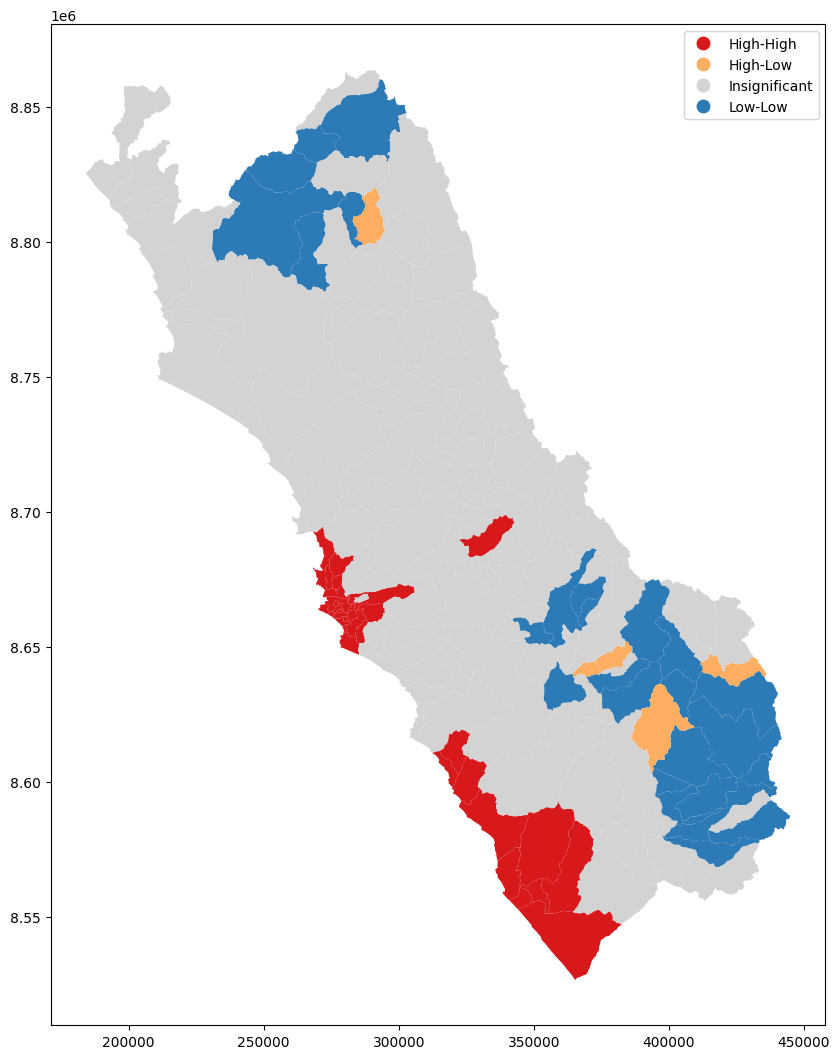

In [6]:
# Compute Local Moran's I (LISA) using education variable and Queen weights
lisa = esda.Moran_Local(lima['Educ_sec_comp2019_pct'], queen_peru)

# Plot LISA results with significance level of 0.05
lisa.plot(lima, crit_value=0.05, figsize=(10,13), legend=True)

Save a column for the LISA category and rename categories

/usr/local/lib/python3.12/dist-packages/geopandas/geodataframe.py:1968: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/tmp/ipython-input-3745261365.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lima.replace({'HS_lisa_queen':labels}, inplace=True)


<Axes: >

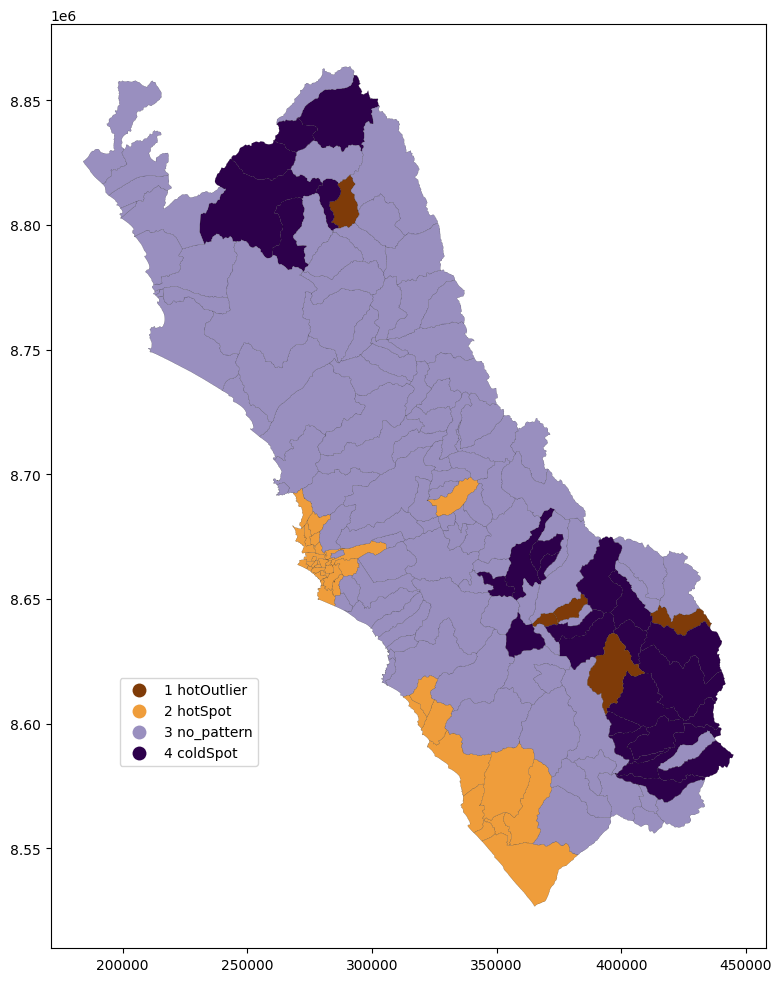

In [7]:
# Extract LISA cluster labels into a new column
lima['HS_lisa_queen'] = lisa.get_cluster_labels(crit_value=0.05)

# Display the count of each LISA category
lima['HS_lisa_queen'].value_counts()

# Define the original labels from LISA output
oldLabels=['Insignificant', 'Low-Low', 'High-High', 'High-Low', 'Low-High']

# Define new custom labels (numbered for ordering: outliers at extremes)
newLabels = ['3 no_pattern', '4 coldSpot','2 hotSpot','1 hotOutlier' , '5 coldOutlier']

# Create dictionary mapping old labels to new labels
labels = dict(zip(oldLabels, newLabels))

# Display the mapping
labels

# Replace the old labels with new custom labels in the dataframe
lima.replace({'HS_lisa_queen':labels}, inplace=True)

# Display the count of renamed categories (sorted by index)
lima['HS_lisa_queen'].value_counts().sort_index()

# Create color palette
myColMap = plt.get_cmap('PuOr', 5)

# Plot the customized LISA map for Queen contiguity
lima.plot(column='HS_lisa_queen',
          categorical=True,
          cmap=myColMap,
          linewidth=0.1,
          edgecolor='k',
          legend=True,
          legend_kwds={'bbox_to_anchor': (0.3, 0.3)},
          figsize=(12,12))

### II.2 KNN

Redo the LISA MAP using a KNN neighborhood matrix (K=8)

<Axes: >

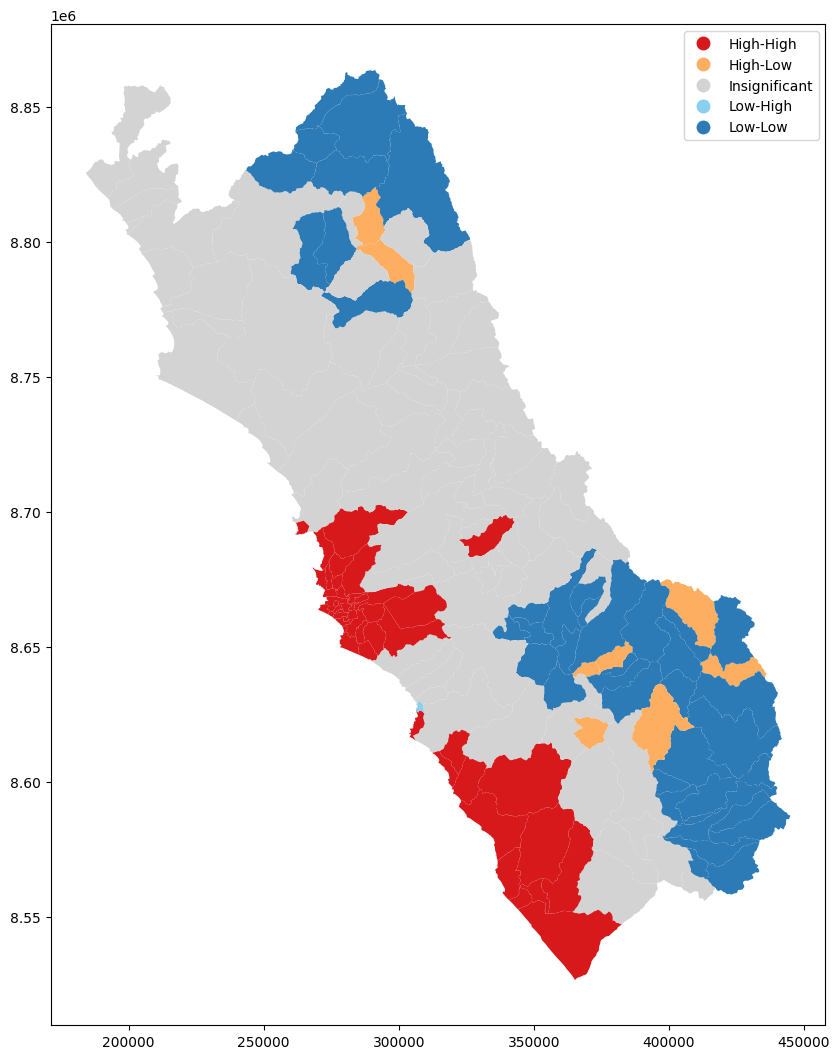

In [8]:
# Build KNN spatial weights with k=8 neighbors using representative points
lima_knn8 = Graph.build_knn(lima.representative_point(), k=8)

# Create KNN adjacency matrix
lima_knn8_Matrix=toWideMatrix(lima_knn8)

# Display the KNN matrix
lima_knn8_Matrix

# Normalize the KNN weights matrix (row-standardize)
lima_knn8=lima_knn8.transform("r")

# Compute Local Moran's I (LISA) using KNN weights
lisa_knn = esda.Moran_Local(lima['Educ_sec_comp2019_pct'], lima_knn8)

# Plot LISA results for KNN with significance level of 0.05
lisa_knn.plot(lima, crit_value=0.05, figsize=(10,13), legend=True)

Save and rename LISA categories for KNN results

/usr/local/lib/python3.12/dist-packages/geopandas/geodataframe.py:1968: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/tmp/ipython-input-1056094774.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lima.replace({'HS_lisa_knn':labels}, inplace=True)


<Axes: >

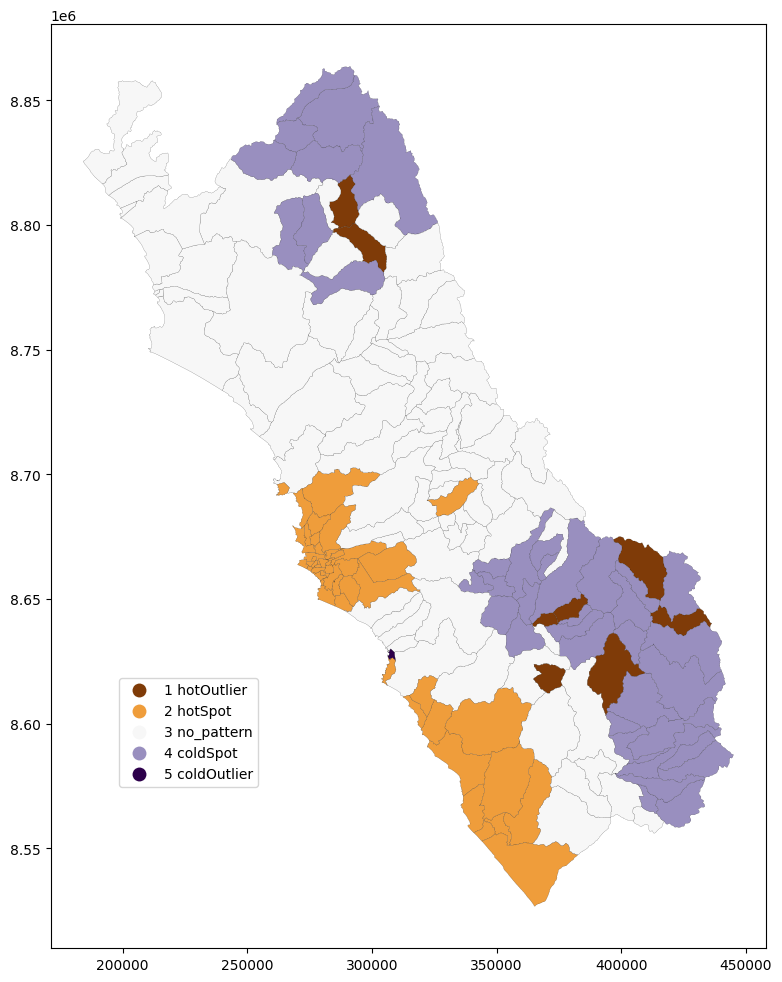

In [9]:
# Extract LISA cluster labels from KNN into a new column
lima['HS_lisa_knn'] = lisa_knn.get_cluster_labels(crit_value=0.05)

# Display the count of each KNN LISA category
lima['HS_lisa_knn'].value_counts()

# Use the same labels dictionary to rename KNN LISA categories
lima.replace({'HS_lisa_knn':labels}, inplace=True)

# Display the count of renamed KNN categories (sorted by index)
lima['HS_lisa_knn'].value_counts().sort_index()

# Plot the customized LISA map for KNN (k=8)
lima.plot(column='HS_lisa_knn',
          categorical=True,
          cmap=myColMap,
          linewidth=0.1,
          edgecolor='k',
          legend=True,
          legend_kwds={'bbox_to_anchor': (0.3, 0.3)},
          figsize=(12,12))

## III. Report: Compare Queen vs. KNN Neighborhoods

Of the 171 districts in Lima, 139 districts (81%) were classified the same way using both Queen contiguity and KNN methods, but 32 districts (19%) received different classifications depending on which neighborhood definition was used. Most of the changes involved districts that showed "no pattern" under Queen contiguity but became significant clusters (hot spots or cold spots) or outliers under KNN

/usr/local/lib/python3.12/dist-packages/geopandas/geodataframe.py:1968: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


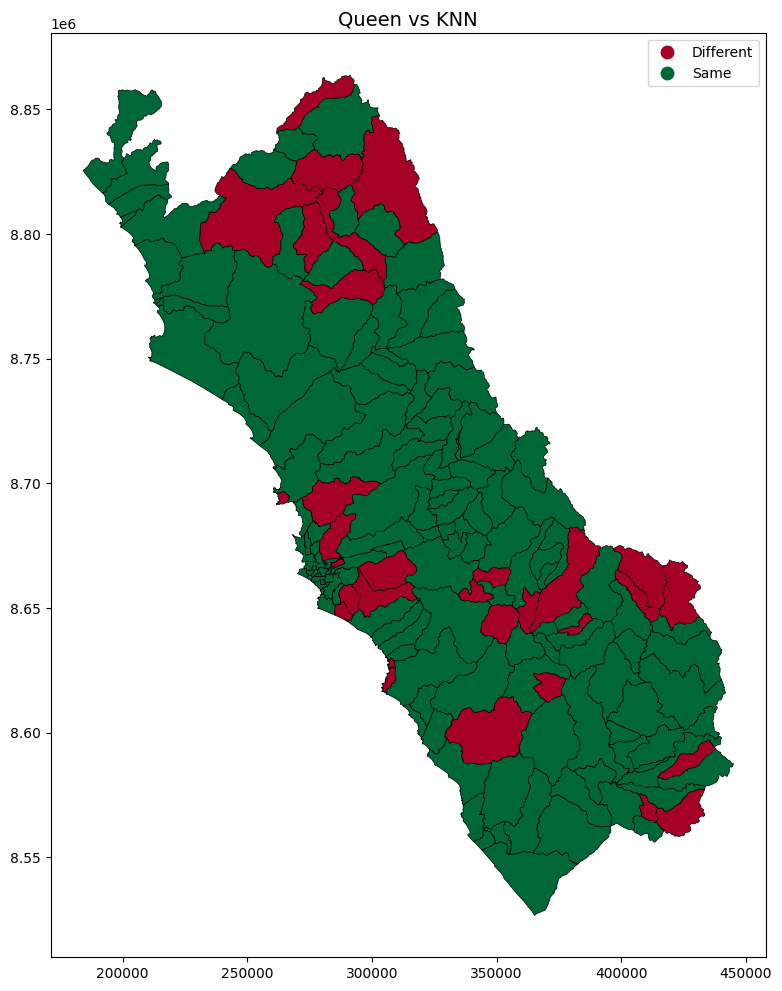

In [15]:
# Visualize which districts changed categories
lima['change_status'] = lima['category_match'].map({True: 'Same', False: 'Different'})

# Plot map showing districts that changed classification
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
lima.plot(column='change_status',
          categorical=True,
          cmap='RdYlGn',
          linewidth=0.5,
          edgecolor='black',
          legend=True,
          ax=ax)
plt.title("Queen vs KNN", fontsize=14)
plt.show()